In [3]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import mglearn

In [4]:
cancer = load_breast_cancer()
cancer

# 0: malignant, 1: 양성

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

p. 74

# 회귀분석

## 회귀(Regression)와 예측

- 비선형인 모델<br>
독립변수, 종속변수가 아닌 w(기울기) 값이 제곱 혹은 세제곱일 때 "비선형"이다.

회귀식 성립 == 대립가설 성립 

귀무가설 == w 값이 0일 때

가설이 수립해야 한다. 주어진 조건이 정규성을 따라야 회귀식이 성립이 된다.

양이 많다면 대부분 정규성을 따른다는 가정 하에, 표본 추출 값도 정규성을 따라야 모수추정이 가능.

정규성을 따르는 것 확인(잔차분석(QQ-plot etc.))

머신러닝 관점은 대수학 관점을 더 보는 경향, 통계학적 관점보다는!

최적의 W를 찾는 것: 머신러닝의 핵심!

### Cost Function (비용함수)

- 적을수록 Good!

- 최적의 W와 b를 탐색하는데 드는 비용

- w를 빨리 구해야하기 때문에 수식을 풀 것. (cost = 잔차 제곱합)_ 미적분 공부하기!!

- w값을 대입 => cost값을 구함


In [22]:
import matplotlib
matplotlib.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

w[0]: 0.393906  b: -0.031804


C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 mi

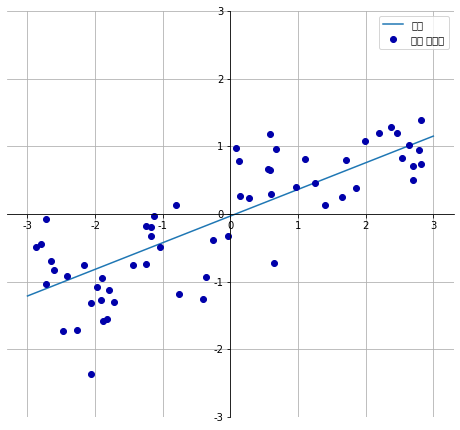

In [23]:
mglearn.plots.plot_linear_regression_wave()

# 점선: 학습된 모델!
# 점: 훈련 데이터!

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 임시 데이터
# X (대문자): 피쳐가 여러 개일 때 대문자X
# y (소문자): y값은 1개라는 뜻

X, y = mglearn.datasets.make_wave(n_samples = 60)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

In [30]:
lr   # 모델 속성값이 뭘로 잡혀있는지 확인하는 습관 들이기!

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
lr.coef_

array([0.39390555])

In [32]:
lr.intercept_

-0.03180434302675973

### R만큼의 통계적 자료가 나오지 않음 *R 프로그래밍을 추천! 

### 분석은 R 추천

In [33]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

# 오버피팅 낮추는 방법: 피쳐를 줄이기(변수 중요도 체크하는 함수를 활용해서!)
# 릿지 회귀나 라소 회귀를 사용하는 것을 권장!!
# w 값을 낮춰야 피쳐야 영향력이 둔감해지면서, cost function이 최저가 됨
# alpha값으로 튜닝
# Accuracy가 높은 것이 최고!

# 테스트 세트 점수 : 결정계수!! (R 스퀘어 제곱) 값!

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


### p.78

## 릿지 회귀

alpha값으로 튜닝

alpha값을 너무 높인다고 좋은 것은 아님!

cost가 가장 최저를 갖는 w값(w: x좌표, cost: y좌표)

지금보다 낮은 방향=> cost 낮추기(좋은 방법인지는 모름) => 기울기로!<br>
x변화량/y변화량(기울기) <= 미분 사용! (현재의 기울기를 구하고 그것보다 낮은 방향으로만 가면 됨!(맞는 방법인지는 모름, 언젠가는 낮아지겠지))
=> 경사각법


In [35]:
X, y = mglearn.datasets.make_forge()  # y값을 범주형으로 뽑아줌   # .make_wave(): y값도 연속형
y

# dataset이 랜덤하게 뽑힘!

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

In [ ]:
# legend(): 범례
# clf: 경계벡터: 학습된 모형을 통째로 던지면 알아서 그려주고, 나머지 설정은 옵션.
# alpha: 투명도
# eps: 여백
# Accuracy: 테스트 점수
